# CSCI 6515 - Assignment 3

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Pre-processing the dataset

In [2]:
train_data = pd.read_csv("sign_mnist_train.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [4]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
test_data= pd.read_csv("sign_mnist_test.csv")
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [7]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
print("Total Null values in the Training Dataset:", train_data.isnull().values.sum())
print("Total NA values in the Training Dataset:", train_data.isna().values.sum())

Total Null values in the Training Dataset: 0
Total NA values in the Training Dataset: 0


In [9]:
print("Total Null values in the Testing Dataset:", test_data.isnull().values.sum())
print("Total NA values in the Testing Dataset:", test_data.isna().values.sum())

Total Null values in the Testing Dataset: 0
Total NA values in the Testing Dataset: 0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Label in the Training Data')

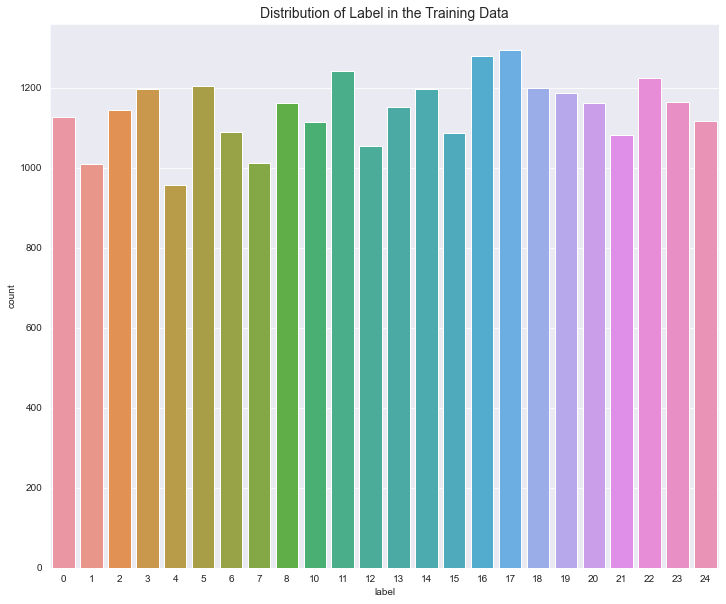

In [10]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
ax = sns.countplot(train_data["label"])
ax.set_title("Distribution of Label in the Training Data", fontsize = 14)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Label in the Testing Data')

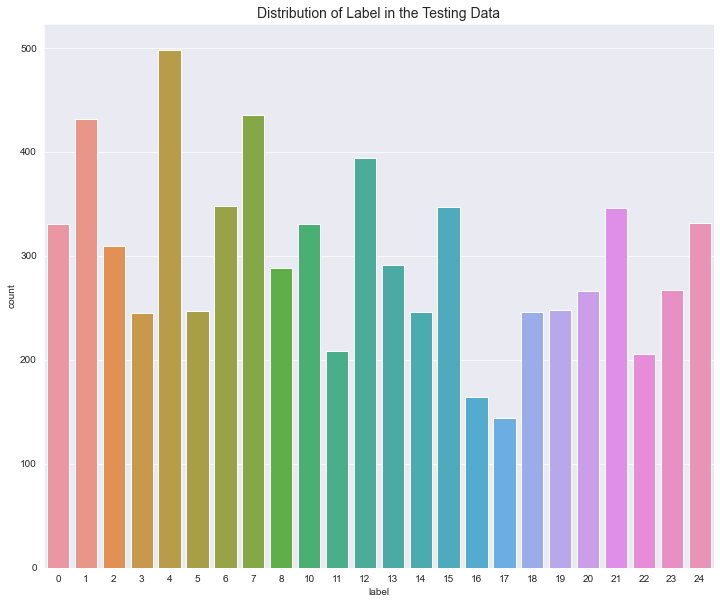

In [11]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
ax = sns.countplot(test_data["label"])
ax.set_title("Distribution of Label in the Testing Data", fontsize = 14)

In [12]:
#Seperating Feature variable and label from the training Dataset 
Y_train = train_data["label"]
X_train = train_data.drop(["label"], axis = 1)

In [13]:
#Seperating Feature variable and label from the testing Dataset
Y_test = test_data["label"]
X_test = test_data.drop(["label"], axis = 1)

In [14]:
#Scaling the X values from Training and Testing Dataset 
X_train /= 255
X_test /= 255

In [15]:
print(X_train)

         pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0      0.419608  0.462745  0.498039  0.525490  0.545098  0.560784  0.572549   
1      0.607843  0.615686  0.611765  0.611765  0.611765  0.615686  0.611765   
2      0.733333  0.737255  0.737255  0.733333  0.733333  0.729412  0.733333   
3      0.827451  0.827451  0.831373  0.831373  0.827451  0.823529  0.827451   
4      0.643137  0.654902  0.666667  0.674510  0.690196  0.701961  0.705882   
...         ...       ...       ...       ...       ...       ...       ...   
27450  0.741176  0.741176  0.745098  0.745098  0.752941  0.756863  0.756863   
27451  0.592157  0.603922  0.615686  0.619608  0.627451  0.631373  0.639216   
27452  0.682353  0.682353  0.682353  0.682353  0.682353  0.686275  0.686275   
27453  0.694118  0.709804  0.721569  0.725490  0.733333  0.741176  0.745098   
27454  0.701961  0.705882  0.705882  0.705882  0.713725  0.709804  0.713725   

         pixel8    pixel9   pixel10  ...  pixel775 

In [16]:
print(X_test)

        pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0     0.584314  0.584314  0.588235  0.588235  0.588235  0.592157  0.592157   
1     0.494118  0.501961  0.513725  0.517647  0.521569  0.525490  0.529412   
2     0.333333  0.345098  0.360784  0.376471  0.411765  0.482353  0.529412   
3     0.796078  0.803922  0.811765  0.807843  0.811765  0.819608  0.823529   
4     0.737255  0.749020  0.756863  0.764706  0.780392  0.788235  0.792157   
...        ...       ...       ...       ...       ...       ...       ...   
7167  0.529412  0.466667  0.423529  0.400000  0.411765  0.388235  0.239216   
7168  0.615686  0.623529  0.631373  0.643137  0.650980  0.650980  0.670588   
7169  0.745098  0.749020  0.745098  0.749020  0.745098  0.745098  0.752941   
7170  0.788235  0.803922  0.815686  0.819608  0.839216  0.847059  0.854902   
7171  0.678431  0.682353  0.678431  0.682353  0.678431  0.678431  0.686275   

        pixel8    pixel9   pixel10  ...  pixel775  pixel776  pi

In [17]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)

In [18]:
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [19]:
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


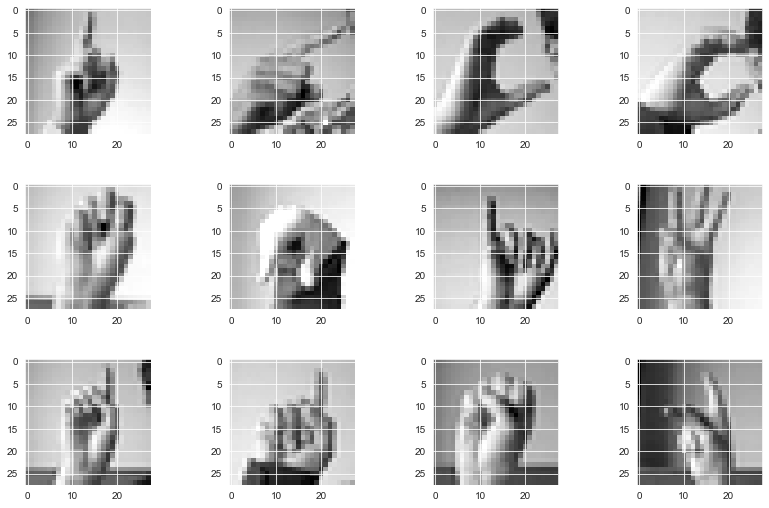

In [20]:
fig, axes = plt.subplots(figsize=(14, 12))

for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.subplots_adjust(hspace = 0.4)

plt.show()

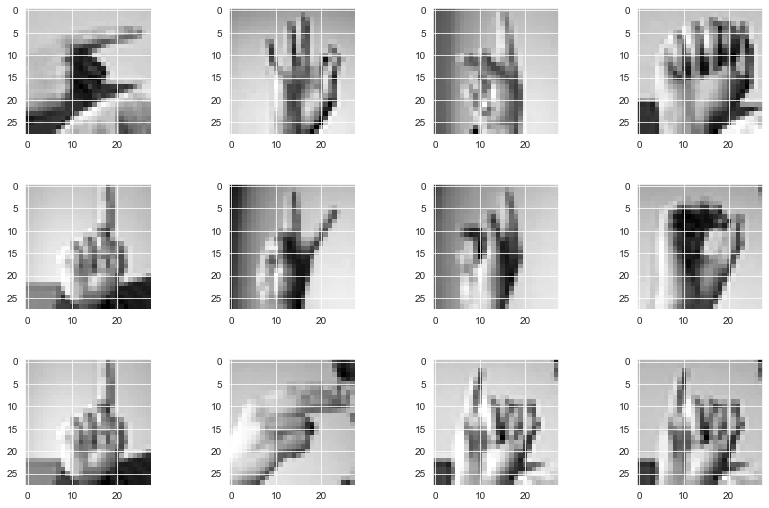

In [21]:
fig, axes = plt.subplots(figsize=(14, 12))

for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.subplots_adjust(hspace = 0.4)

plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from timeit import Timer

# Model 1: Three CNN layers with BatchNormalization and Dropout followed by Two Dense Layers 

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42) 

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)
(5491,)
(7172, 28, 28, 1)
(7172,)


In [25]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = 5, strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model1.add(MaxPooling2D(padding = "same"))
model1.add(BatchNormalization())

model1.add(Conv2D(64, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(padding = "same"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Conv2D(128, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(padding = "same"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(64, activation = "relu"))
model1.add(Dropout(0.2))

model1.add(Dense(26, activation = "softmax"))



In [26]:
model1.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy", optimizer = "adam")
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [27]:
from tensorflow.keras.utils import plot_model

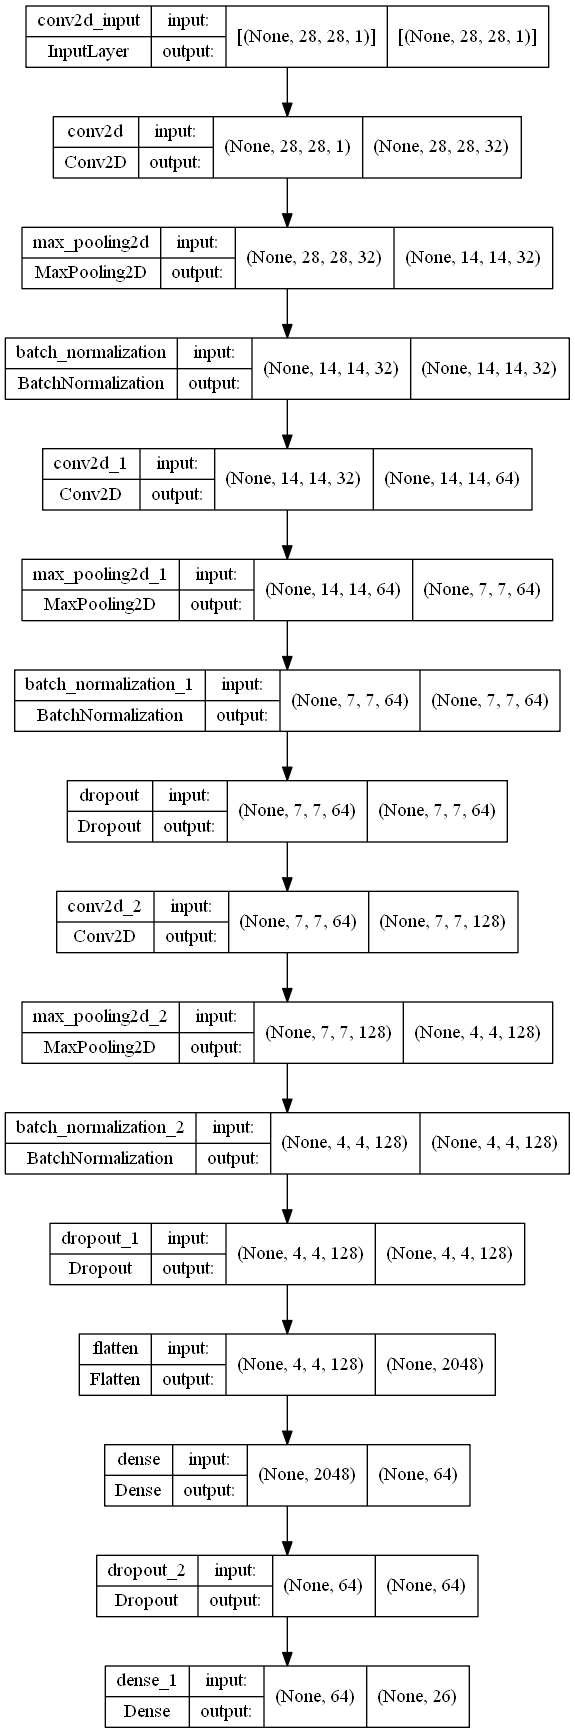

In [28]:
plot_model(model1, to_file= 'model1_plot.png', show_shapes=True,show_layer_names= True)

In [29]:
history1 = model1.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 50, epochs = 20)

Epoch 1/20
440/440 [==============================] - 232s 520ms/step - loss: 0.5255 - accuracy: 0.8413 - val_loss: 3.2208 - val_accuracy: 0.2029
Epoch 2/20
440/440 [==============================] - 227s 516ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.1071 - val_accuracy: 0.9665
Epoch 3/20
440/440 [==============================] - 231s 525ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.2510 - val_accuracy: 0.9341
Epoch 4/20
440/440 [==============================] - 222s 505ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 5/20
440/440 [==============================] - 231s 524ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.1827 - val_accuracy: 0.9563
Epoch 6/20
440/440 [==============================] - 228s 517ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 7/20
440/440 [==============================] - 225s 511ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.1132 -

In [30]:
train_pred = model1.predict(X_test)
train_pred = np.argmax(train_pred,axis = 1)

In [31]:
print(classification_report(Y_test, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.88      0.98      0.93       348
           7       0.96      0.94      0.95       436
           8       1.00      1.00      1.00       288
          10       0.94      0.95      0.95       331
          11       0.96      1.00      0.98       209
          12       0.96      1.00      0.98       394
          13       1.00      0.93      0.96       291
          14       1.00      0.99      1.00       246
          15       0.97      1.00      0.99       347
          16       1.00      0.99      1.00       164
          17       0.89      0.78      0.83       144
          18       1.00    

In [32]:
score = model1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

score = model1.evaluate(X_val, Y_val, verbose = 0)
print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  100.00%
Validation Accuracy: 100.00%
Testing Accuracy: 97.59%


In [33]:
def plot_accuracy():
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['accuracy', 'val_accuracy'], fontsize = 14)
    plt.show()
    
def plot_loss():
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('Model Loss', fontsize = 16)
    plt.ylabel('Loss', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['loss', 'val_loss'], fontsize = 14)
    plt.show()

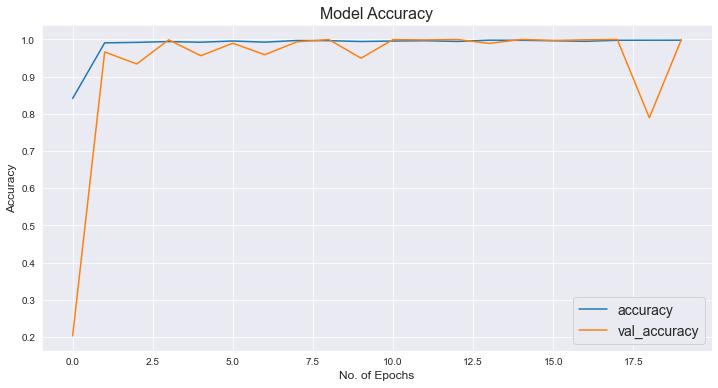

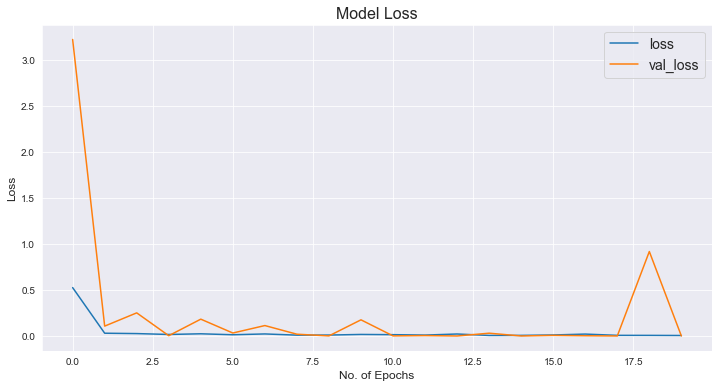

In [34]:
plt.figure(figsize=(12,6))
plot_accuracy()
plt.figure(figsize=(12,6))
plot_loss()

# Model 2 - Three CNN layers without Batch Normalization and Dropout followed by Two Dense Layers

In [35]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size = 5, strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model2.add(MaxPooling2D(padding = "same"))

model2.add(Conv2D(64, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model2.add(MaxPooling2D(padding = "same"))

model2.add(Conv2D(128, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model2.add(MaxPooling2D(padding = "same"))

model2.add(Flatten())

model2.add(Dense(64, activation = "relu"))

model2.add(Dense(26, activation = "softmax"))

In [36]:
model2.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy", optimizer = "adam")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [37]:
history2 = model2.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 50, epochs = 20)

Epoch 1/20
440/440 [==============================] - 209s 470ms/step - loss: 1.3681 - accuracy: 0.5792 - val_loss: 0.1630 - val_accuracy: 0.9550
Epoch 2/20
440/440 [==============================] - 208s 472ms/step - loss: 0.0737 - accuracy: 0.9809 - val_loss: 0.1276 - val_accuracy: 0.9681
Epoch 3/20
440/440 [==============================] - 209s 475ms/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/20
440/440 [==============================] - 212s 483ms/step - loss: 8.5921e-04 - accuracy: 1.0000 - val_loss: 7.7005e-04 - val_accuracy: 1.0000
Epoch 5/20
440/440 [==============================] - 208s 472ms/step - loss: 5.2120e-04 - accuracy: 1.0000 - val_loss: 4.1853e-04 - val_accuracy: 1.0000
Epoch 6/20
440/440 [==============================] - 206s 469ms/step - loss: 2.7601e-04 - accuracy: 1.0000 - val_loss: 2.7049e-04 - val_accuracy: 1.0000
Epoch 7/20
440/440 [==============================] - 207s 470ms/step - loss: 1.7686e-04 - accuracy:

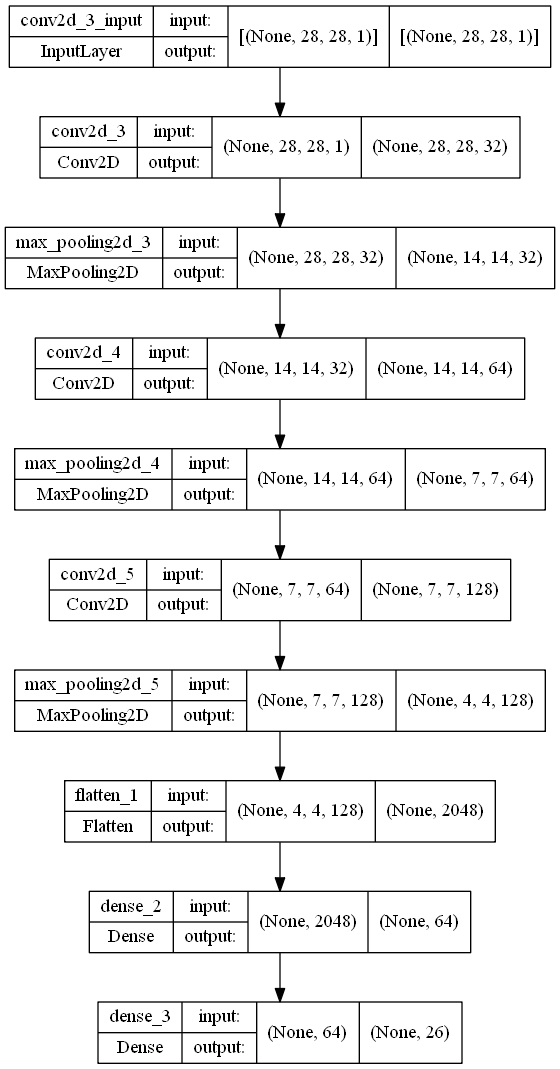

In [38]:
plot_model(model2, to_file= 'model2_plot.png', show_shapes=True,show_layer_names= True)

In [39]:
score = model2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

#score = model1.evaluate(X_val, Y_val, verbose = 0)
#print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  100.00%
Testing Accuracy: 91.09%


In [40]:
train_pred = model2.predict(X_test)
train_pred = np.argmax(train_pred,axis = 1)

In [41]:
print(classification_report(Y_test, train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      0.94      0.97       432
           2       1.00      0.94      0.97       310
           3       0.87      0.90      0.89       245
           4       0.91      0.99      0.95       498
           5       0.93      1.00      0.96       247
           6       0.84      0.89      0.86       348
           7       0.96      0.95      0.96       436
           8       1.00      0.99      0.99       288
          10       0.83      0.81      0.82       331
          11       0.87      1.00      0.93       209
          12       0.91      0.89      0.90       394
          13       0.86      0.76      0.81       291
          14       0.99      0.83      0.90       246
          15       0.95      1.00      0.97       347
          16       1.00      1.00      1.00       164
          17       0.69      0.84      0.76       144
          18       0.77    

In [42]:
def plot_accuracy():
    plt.plot(history2.history['accuracy'])
    plt.plot(history2.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['accuracy', 'val_accuracy'], fontsize = 14)
    plt.show()
    
def plot_loss():
    plt.plot(history2.history['loss'])
    plt.plot(history2.history['val_loss'])
    plt.title('Model Loss', fontsize = 16)
    plt.ylabel('Loss', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['loss', 'val_loss'], fontsize = 14)
    plt.show()

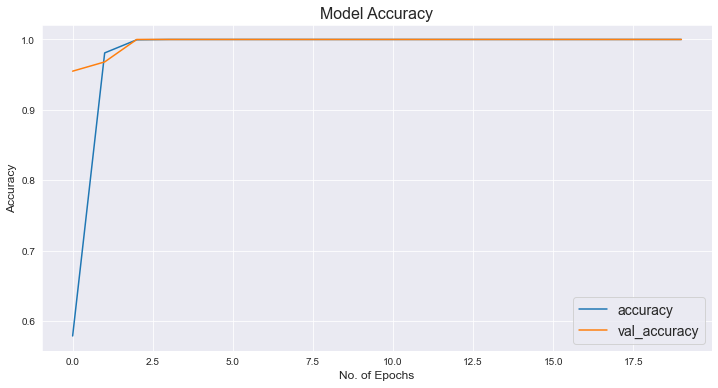

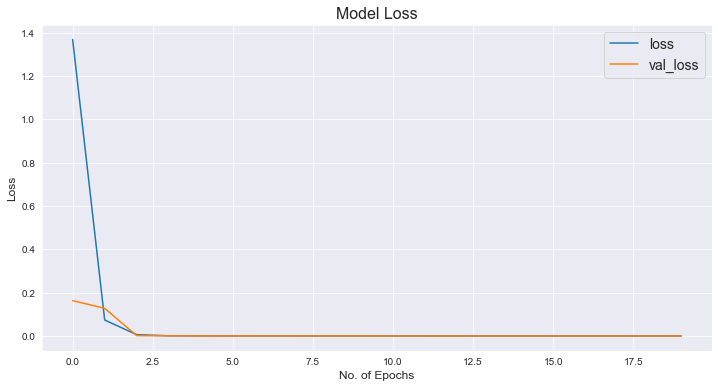

In [43]:
plt.figure(figsize=(12,6))
plot_accuracy()
plt.figure(figsize=(12,6))
plot_loss()

# Model 3 - Two CNN Layers with Batch Normalization and Dropout followed by Two Dense Layers 

In [44]:
model3 = Sequential()

model3.add(Conv2D(64, kernel_size = 5, strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model3.add(MaxPooling2D(padding = "same"))
model3.add(BatchNormalization())

model3.add(Conv2D(128, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(padding = "same"))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.2))

model3.add(Dense(26, activation = "softmax"))

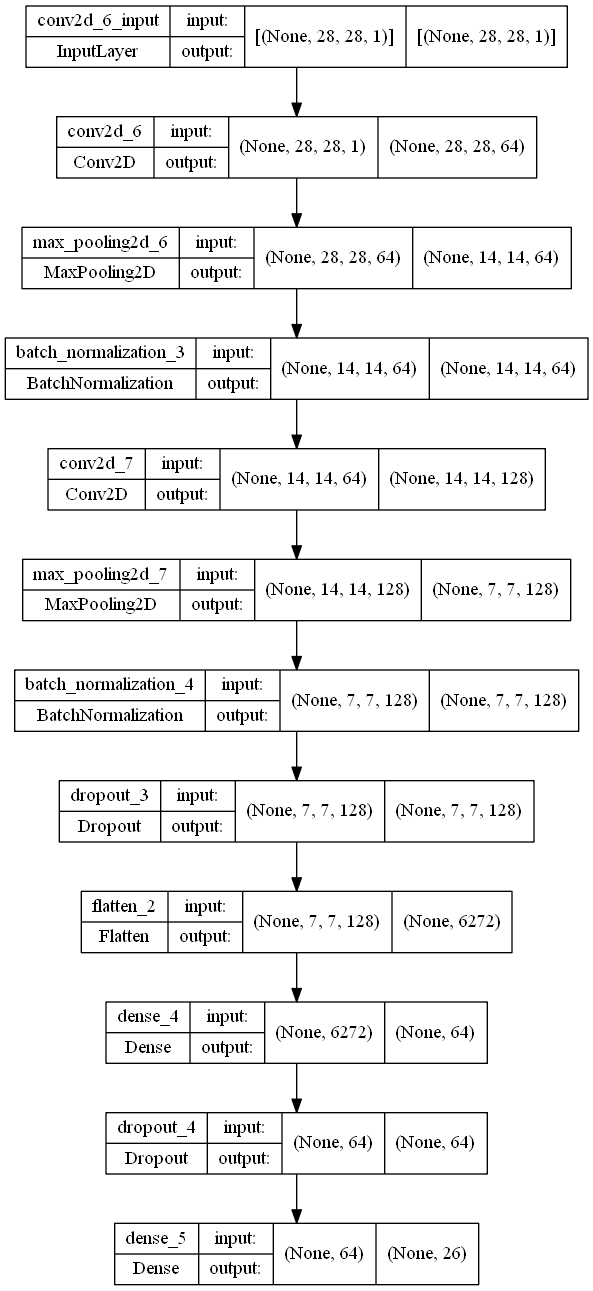

In [45]:
plot_model(model3, to_file= 'model2_plot.png', show_shapes=True,show_layer_names= True)

In [46]:
model3.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy", optimizer = "adam")
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                      

In [47]:
history3 = model3.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 50, epochs = 20)

Epoch 1/20
440/440 [==============================] - 387s 866ms/step - loss: 0.7705 - accuracy: 0.7674 - val_loss: 5.1173 - val_accuracy: 0.1431
Epoch 2/20
440/440 [==============================] - 386s 877ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0147 - val_accuracy: 0.9969
Epoch 3/20
440/440 [==============================] - 371s 843ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 4/20
440/440 [==============================] - 366s 831ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.5513 - val_accuracy: 0.8667
Epoch 5/20
440/440 [==============================] - 363s 826ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.3548 - val_accuracy: 0.8798
Epoch 6/20
440/440 [==============================] - 363s 825ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0201 - val_accuracy: 0.9945
Epoch 7/20
440/440 [==============================] - 365s 829ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0668 -

In [48]:
score = model3.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

#score = model1.evaluate(X_val, Y_val, verbose = 0)
#print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model3.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  97.59%
Testing Accuracy: 87.05%


In [49]:
train_pred = model3.predict(X_test)
train_pred = np.argmax(train_pred,axis = 1)

In [50]:
print(classification_report(Y_test, train_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.79      0.89       432
           2       0.98      1.00      0.99       310
           3       1.00      0.96      0.98       245
           4       1.00      0.86      0.92       498
           5       0.96      1.00      0.98       247
           6       0.88      0.84      0.86       348
           7       0.94      0.87      0.90       436
           8       0.97      0.77      0.86       288
          10       0.74      0.93      0.83       331
          11       0.99      1.00      1.00       209
          12       0.91      0.88      0.90       394
          13       0.86      0.86      0.86       291
          14       1.00      0.90      0.95       246
          15       0.69      1.00      0.81       347
          16       0.98      0.99      0.98       164
          17       0.59      0.38      0.46       144
          18       0.58    

In [51]:
def plot_accuracy():
    plt.plot(history3.history['accuracy'])
    plt.plot(history3.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['accuracy', 'val_accuracy'], fontsize = 14)
    plt.show()
    
def plot_loss():
    plt.plot(history3.history['loss'])
    plt.plot(history3.history['val_loss'])
    plt.title('Model Loss', fontsize = 16)
    plt.ylabel('Loss', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['loss', 'val_loss'], fontsize = 14)
    plt.show()

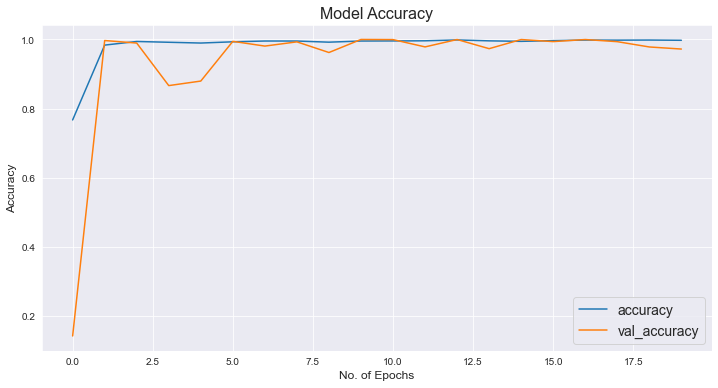

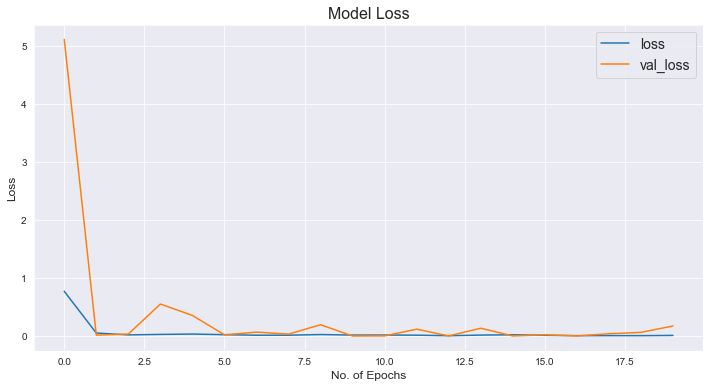

In [52]:
plt.figure(figsize=(12,6))
plot_accuracy()
plt.figure(figsize=(12,6))
plot_loss()

# Model 4 - Two CNN layers without Batch Normalization and Dropout followed by two Dense Layers  

In [53]:
model4 = Sequential()

model4.add(Conv2D(64, kernel_size = 5, strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model4.add(MaxPooling2D(padding = "same"))

model4.add(Conv2D(128, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model4.add(MaxPooling2D(padding = "same"))

model4.add(Flatten())

model4.add(Dense(64, activation = "relu"))

model4.add(Dense(26, activation = "softmax"))

In [54]:
model4.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy", optimizer = "adam")
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

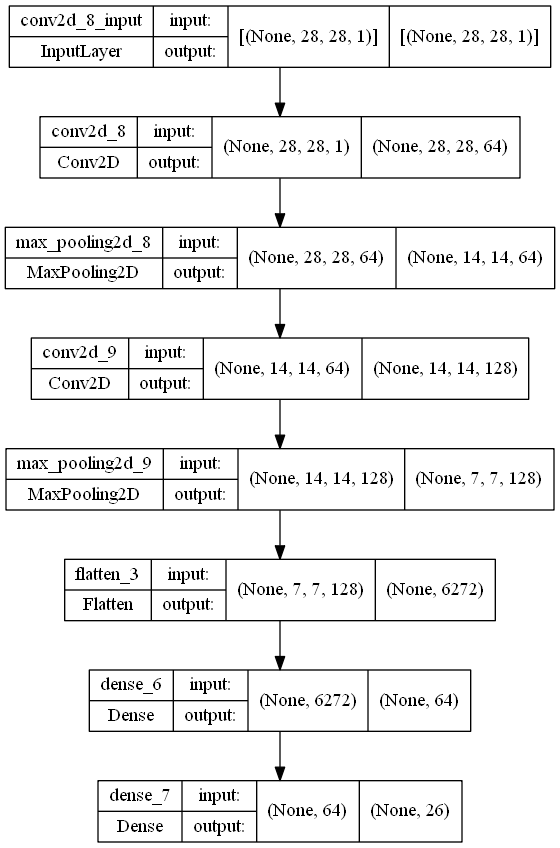

In [55]:
plot_model(model4, to_file= 'model4_plot.png', show_shapes=True,show_layer_names= True)

In [56]:
history4 = model4.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 50, epochs = 20)

Epoch 1/20
440/440 [==============================] - 335s 759ms/step - loss: 1.4374 - accuracy: 0.5570 - val_loss: 0.3773 - val_accuracy: 0.8944
Epoch 2/20
440/440 [==============================] - 338s 768ms/step - loss: 0.1571 - accuracy: 0.9617 - val_loss: 0.0623 - val_accuracy: 0.9834
Epoch 3/20
440/440 [==============================] - 337s 766ms/step - loss: 0.0259 - accuracy: 0.9959 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/20
440/440 [==============================] - 337s 766ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/20
440/440 [==============================] - 336s 763ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/20
440/440 [==============================] - 336s 764ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/20
440/440 [==============================] - 341s 775ms/step - loss: 6.6073e-04 - accuracy: 1.0000 - val_loss: 6.25

In [57]:
score = model4.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

#score = model1.evaluate(X_val, Y_val, verbose = 0)
#print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model4.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  100.00%
Testing Accuracy: 89.89%


In [58]:
train_pred = model4.predict(X_test)
train_pred = np.argmax(train_pred,axis = 1)

In [59]:
print(classification_report(Y_test, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.95      0.98       432
           2       1.00      1.00      1.00       310
           3       0.74      0.90      0.81       245
           4       0.96      0.96      0.96       498
           5       0.91      1.00      0.95       247
           6       0.95      0.89      0.92       348
           7       0.96      0.96      0.96       436
           8       0.99      0.85      0.92       288
          10       0.82      0.88      0.85       331
          11       0.91      1.00      0.95       209
          12       0.99      0.84      0.91       394
          13       0.91      0.79      0.84       291
          14       1.00      0.87      0.93       246
          15       0.92      1.00      0.96       347
          16       0.69      1.00      0.82       164
          17       0.77      0.97      0.86       144
          18       0.68    

In [62]:
def plot_accuracy():
    plt.plot(history4.history['accuracy'])
    plt.plot(history4.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['accuracy', 'val_accuracy'], fontsize = 14)
    plt.show()
    
def plot_loss():
    plt.plot(history4.history['loss'])
    plt.plot(history4.history['val_loss'])
    plt.title('Model Loss', fontsize = 16)
    plt.ylabel('Loss', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['loss', 'val_loss'], fontsize = 14)
    plt.show()

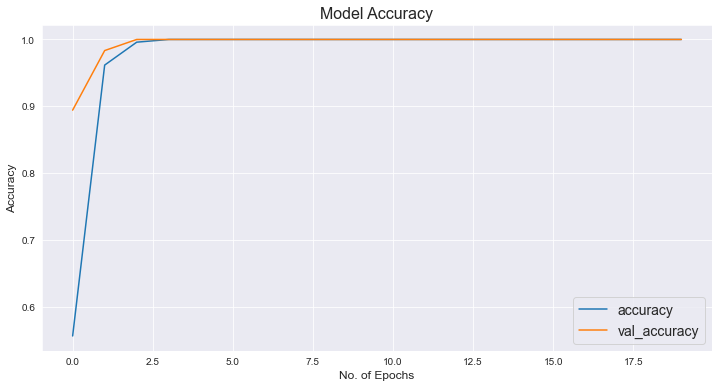

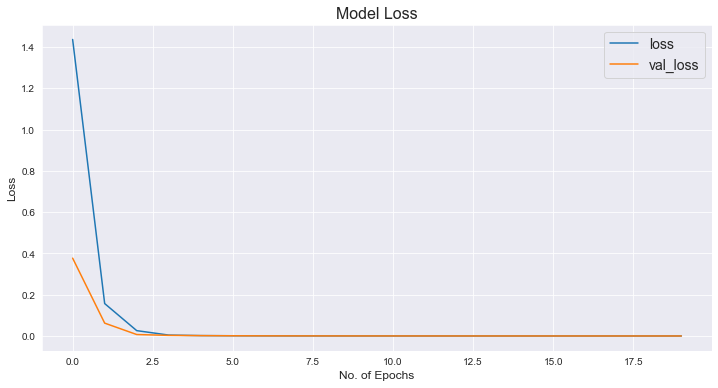

In [63]:
plt.figure(figsize=(12,6))
plot_accuracy()
plt.figure(figsize=(12,6))
plot_loss()

# Changing the Optimizer and its parameter with the Best Baseline Model

In [69]:
model5 = Sequential()

model5.add(Conv2D(32, kernel_size = 5, strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)))
model5.add(MaxPooling2D(padding = "same"))
model5.add(BatchNormalization())

model5.add(Conv2D(64, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model5.add(MaxPooling2D(padding = "same"))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Conv2D(128, kernel_size = 5, strides = 1, padding = "same", activation = "relu"))
model5.add(MaxPooling2D(padding = "same"))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Flatten())

model5.add(Dense(64, activation = "relu"))
model5.add(Dropout(0.2))

model5.add(Dense(26, activation = "softmax"))

In [70]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [72]:
model5.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy", optimizer = opt1)
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [73]:
history5 = model5.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 50, epochs = 20)

Epoch 1/20
440/440 [==============================] - 199s 451ms/step - loss: 1.1414 - accuracy: 0.6621 - val_loss: 0.8267 - val_accuracy: 0.8385
Epoch 2/20
440/440 [==============================] - 198s 451ms/step - loss: 0.1652 - accuracy: 0.9566 - val_loss: 0.0207 - val_accuracy: 0.9998
Epoch 3/20
440/440 [==============================] - 195s 443ms/step - loss: 0.0714 - accuracy: 0.9849 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 4/20
440/440 [==============================] - 192s 437ms/step - loss: 0.0419 - accuracy: 0.9930 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 5/20
440/440 [==============================] - 194s 440ms/step - loss: 0.0294 - accuracy: 0.9954 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/20
440/440 [==============================] - 194s 440ms/step - loss: 0.0221 - accuracy: 0.9964 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/20
440/440 [==============================] - 214s 487ms/step - loss: 0.0190 - accuracy: 0.9968 - val_loss: 4.9454e-

In [74]:
score = model5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

score = model5.evaluate(X_val, Y_val, verbose = 0)
print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  100.00%
Validation Accuracy: 100.00%
Testing Accuracy: 95.59%


In [76]:
train_pred = model5.predict(X_test)
train_pred = np.argmax(train_pred,axis = 1)

In [77]:
print(classification_report(Y_test, train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.92      1.00      0.96       498
           5       1.00      1.00      1.00       247
           6       0.94      0.95      0.94       348
           7       1.00      0.95      0.98       436
           8       0.95      1.00      0.97       288
          10       1.00      0.94      0.97       331
          11       0.92      1.00      0.96       209
          12       0.90      0.95      0.92       394
          13       1.00      0.82      0.90       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.82      0.85      0.84       144
          18       0.91    

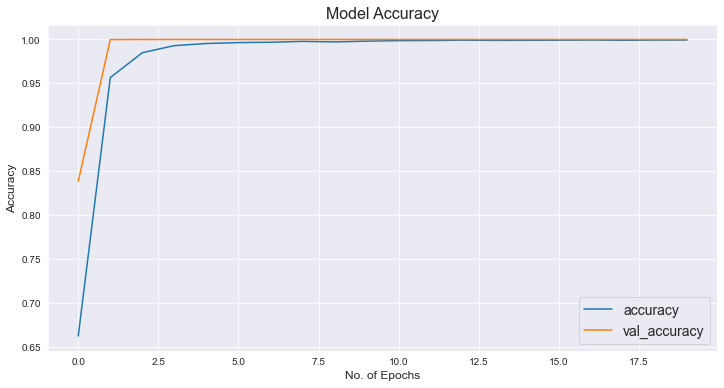

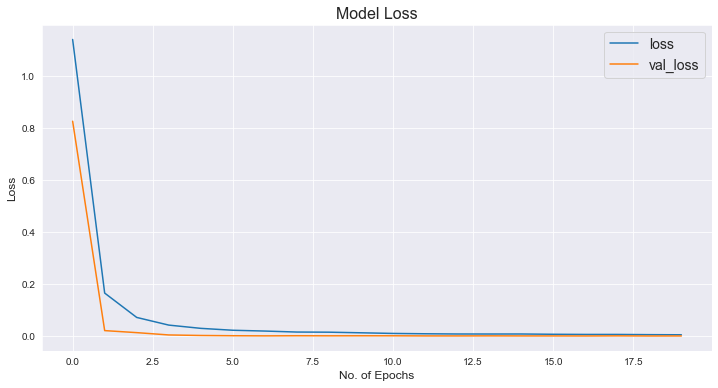

In [78]:
def plot_accuracy():
    plt.plot(history5.history['accuracy'])
    plt.plot(history5.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['accuracy', 'val_accuracy'], fontsize = 14)
    plt.show()
    
def plot_loss():
    plt.plot(history5.history['loss'])
    plt.plot(history5.history['val_loss'])
    plt.title('Model Loss', fontsize = 16)
    plt.ylabel('Loss', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['loss', 'val_loss'], fontsize = 14)
    plt.show()
    
plt.figure(figsize=(12,6))
plot_accuracy()
plt.figure(figsize=(12,6))
plot_loss()

In [83]:
opt2 = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.95, momentum=0.9)

In [84]:
model5.compile(loss="sparse_categorical_crossentropy", metrics = "accuracy", optimizer = opt2)
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [85]:
history5 = model5.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 50, epochs = 20)

Epoch 1/20
440/440 [==============================] - 201s 454ms/step - loss: 3.1943 - accuracy: 0.0419 - val_loss: 3.1851 - val_accuracy: 0.0419
Epoch 2/20
440/440 [==============================] - 244s 554ms/step - loss: 3.1921 - accuracy: 0.0423 - val_loss: 3.2015 - val_accuracy: 0.0463
Epoch 3/20
440/440 [==============================] - 197s 448ms/step - loss: 3.1937 - accuracy: 0.0427 - val_loss: 3.1865 - val_accuracy: 0.0530
Epoch 4/20
440/440 [==============================] - 191s 435ms/step - loss: 3.1944 - accuracy: 0.0424 - val_loss: 3.1836 - val_accuracy: 0.0401
Epoch 5/20
440/440 [==============================] - 203s 462ms/step - loss: 3.1925 - accuracy: 0.0431 - val_loss: 3.1820 - val_accuracy: 0.0488
Epoch 6/20
440/440 [==============================] - 290s 659ms/step - loss: 3.1923 - accuracy: 0.0430 - val_loss: 3.1894 - val_accuracy: 0.0475
Epoch 7/20
440/440 [==============================] - 305s 692ms/step - loss: 3.1925 - accuracy: 0.0434 - val_loss: 3.1949 -

In [86]:
score = model5.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

score = model5.evaluate(X_val, Y_val, verbose = 0)
print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model5.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  4.29%
Validation Accuracy: 3.99%
Testing Accuracy: 4.02%


In [87]:
train_pred = model5.predict(X_test)
train_pred = np.argmax(train_pred,axis = 1)
print(classification_report(Y_test, train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       245
           4       0.00      0.00      0.00       498
           5       0.00      0.00      0.00       247
           6       0.00      0.00      0.00       348
           7       0.00      0.00      0.00       436
           8       0.04      1.00      0.08       288
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.00      0.00      0.00       291
          14       0.00      0.00      0.00       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
          17       0.00      0.00      0.00       144
          18       0.00    

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


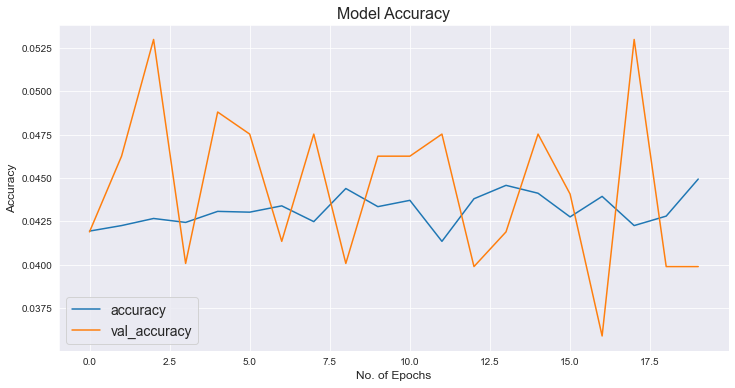

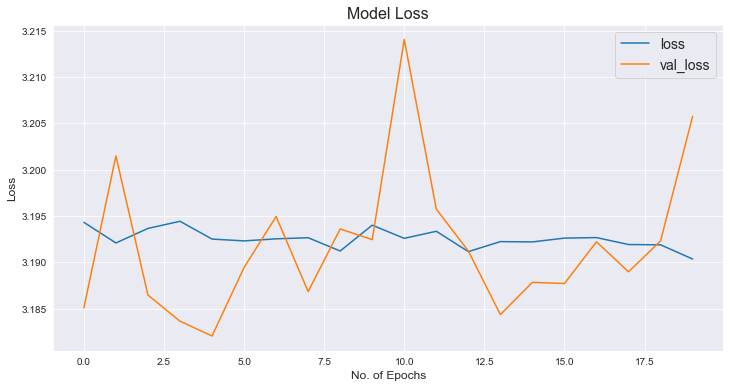

In [88]:
def plot_accuracy():
    plt.plot(history5.history['accuracy'])
    plt.plot(history5.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize = 16)
    plt.ylabel('Accuracy', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['accuracy', 'val_accuracy'], fontsize = 14)
    plt.show()
    
def plot_loss():
    plt.plot(history5.history['loss'])
    plt.plot(history5.history['val_loss'])
    plt.title('Model Loss', fontsize = 16)
    plt.ylabel('Loss', fontsize = 12)
    plt.xlabel('No. of Epochs', fontsize = 12)
    plt.legend(['loss', 'val_loss'], fontsize = 14)
    plt.show()
    
plt.figure(figsize=(12,6))
plot_accuracy()
plt.figure(figsize=(12,6))
plot_loss()

# Training the Model with Data Augmentation 

In [89]:
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

In [98]:
data_gen=ImageDataGenerator(rotation_range = 0.2, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1, 
                            horizontal_flip=True)
data_gen.fit(X_train)

In [105]:
history6 = model6.fit(data_gen.flow(X_train,Y_train,batch_size=50),epochs=20,validation_data = (X_val, Y_val))

Epoch 1/20
440/440 [==============================] - 213s 482ms/step - loss: 0.2411 - accuracy: 0.9798 - val_loss: 0.2142 - val_accuracy: 0.9924
Epoch 2/20
440/440 [==============================] - 218s 496ms/step - loss: 0.2477 - accuracy: 0.9798 - val_loss: 0.2183 - val_accuracy: 0.9903
Epoch 3/20
440/440 [==============================] - 215s 488ms/step - loss: 0.2528 - accuracy: 0.9796 - val_loss: 0.2355 - val_accuracy: 0.9902
Epoch 4/20
440/440 [==============================] - 211s 480ms/step - loss: 0.2444 - accuracy: 0.9830 - val_loss: 0.1705 - val_accuracy: 0.9987
Epoch 5/20
440/440 [==============================] - 221s 502ms/step - loss: 0.2261 - accuracy: 0.9835 - val_loss: 0.1669 - val_accuracy: 1.0000
Epoch 6/20
440/440 [==============================] - 244s 555ms/step - loss: 0.2326 - accuracy: 0.9825 - val_loss: 0.1957 - val_accuracy: 0.9945
Epoch 7/20
440/440 [==============================] - 259s 589ms/step - loss: 0.2412 - accuracy: 0.9822 - val_loss: 0.2781 -

In [106]:
score = model6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

score = model6.evaluate(X_val, Y_val, verbose = 0)
print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  99.97%
Validation Accuracy: 99.91%
Testing Accuracy: 99.74%


In [135]:
score = model6.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", f'{score[1]*100:.2f}%')

score = model6.evaluate(X_val, Y_val, verbose = 0)
print("Validation Accuracy:", f'{score[1]*100:.2f}%')

score = model6.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy:" , f'{score[1]*100:.2f}%')

Training Accuracy:  99.97%
Validation Accuracy: 99.91%
Testing Accuracy: 99.74%
